# Facebook's Prophet
#### This is a practice of what's on https://facebook.github.io/prophet/docs/quick_start.html#r-api
#### Data is from https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
#### & https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [5]:
# Load library
library(prophet)

In [6]:
# Read data
Data <- read.csv('us-states.csv', header=TRUE)

# date and state come in as factors. Change them to characters.
Data$date  <- as.Date(Data$date)
Data$state <- as.character(Data$state)

# Cursory check
Data

date,state,fips,cases,deaths
<date>,<chr>,<int>,<int>,<int>
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0


In [7]:
# Consolidate California cases as CA data frame.
# Aggregate all states as US data frame.
# Calculate differences between rows. This is is daily_new
library(dplyr)

CA <- Data[(Data$state=='California'),c('date','cases')] %>% mutate(daily_new=c(0, diff(cases)))
CA

US <- aggregate(cases ~ date, data=Data, sum) %>% mutate(daily_new=c(0, diff(cases)))
US

date,cases,daily_new
<date>,<int>,<dbl>
2020-01-25,1,0
2020-01-26,2,1
2020-01-27,2,0
2020-01-28,2,0
2020-01-29,2,0
2020-01-30,2,0
2020-01-31,3,1
2020-02-01,3,0
2020-02-02,6,3


date,cases,daily_new
<date>,<int>,<dbl>
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,1
2020-01-25,3,1
2020-01-26,5,2
2020-01-27,5,0
2020-01-28,5,0
2020-01-29,5,0


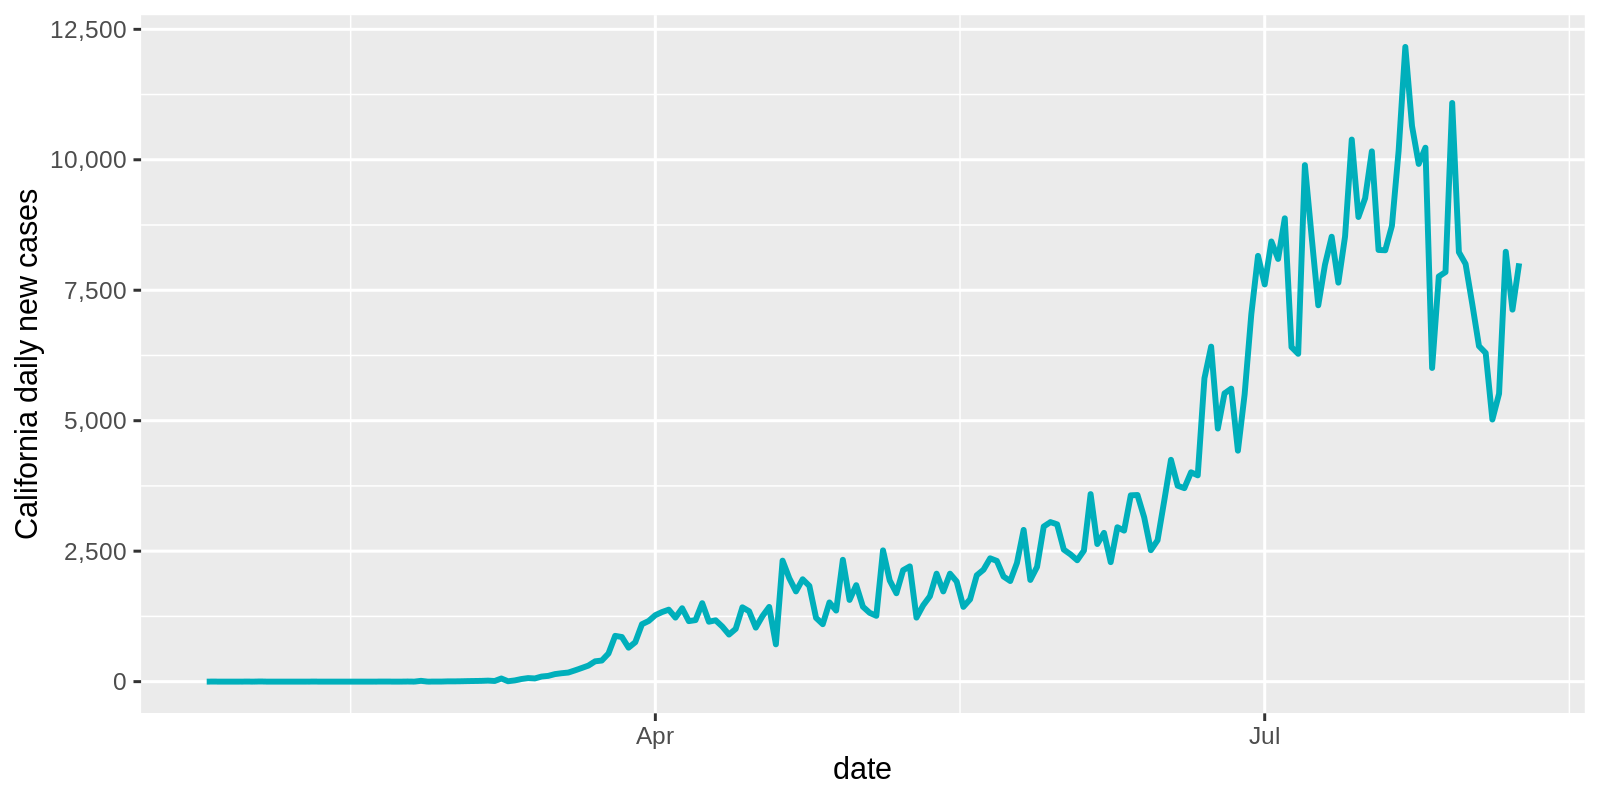

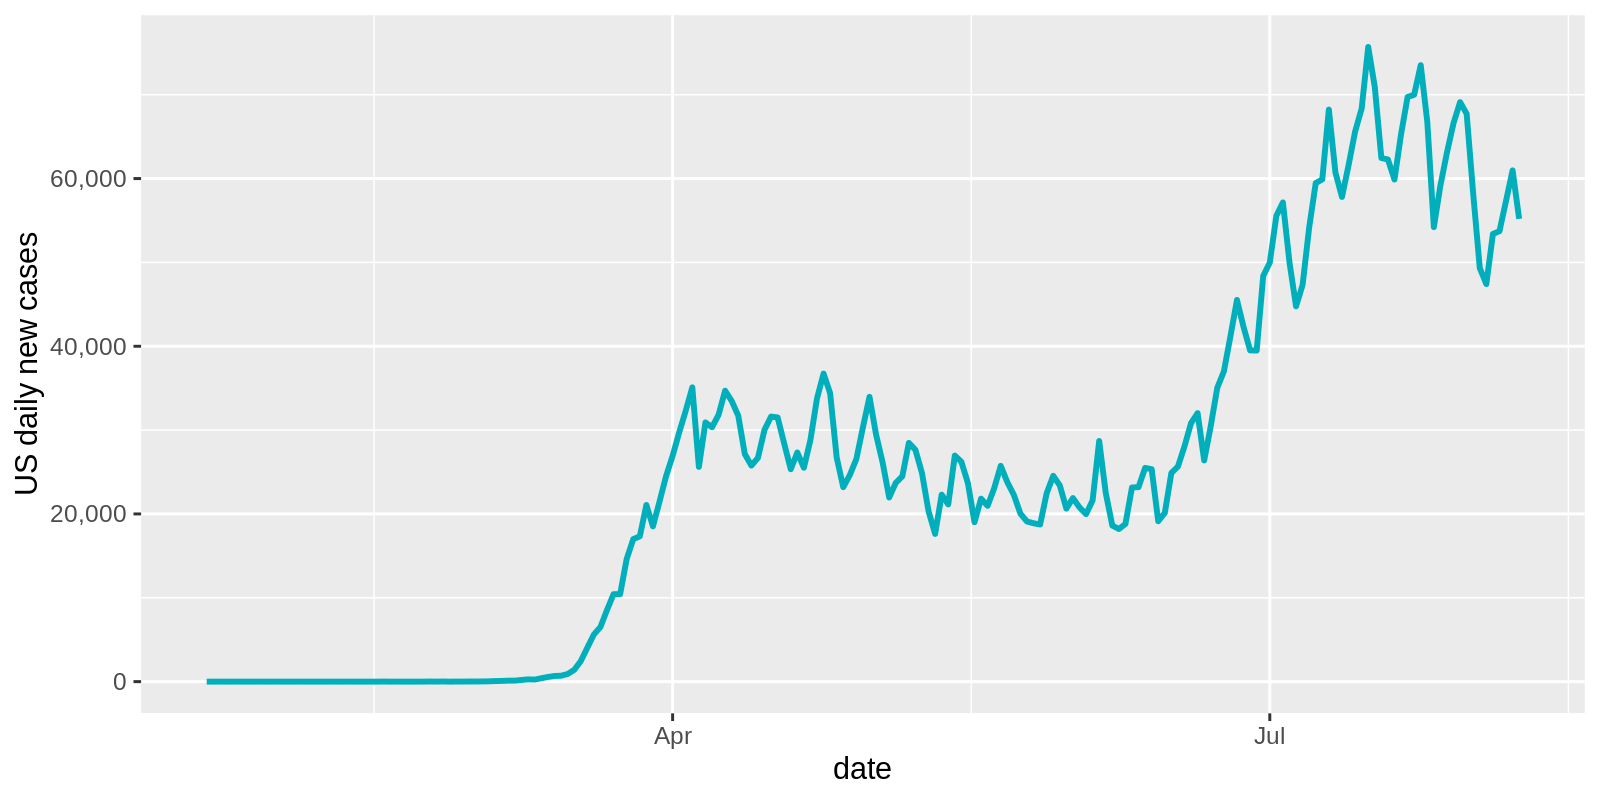

In [10]:
# Plot 'daily_new'(y) vs 'date'(x) for California
library(ggplot2)
options(repr.plot.height=4, repr.plot.width=8, repr.plot.res = 200)
ggplot(data = CA, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)

# Plot 'daily_new'(y) vs 'date'(x) for US
ggplot(data = US, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [11]:
# Select data where daily_new becomes >=100
day1 <- CA %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
CA <- CA[CA$date>=day1$date,]
CA

day1 <- US %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
US <- US[US$date>=day1$date,]
US

,date,cases,daily_new
,<date>,<int>,<dbl>
52,2020-03-16,588,110
53,2020-03-17,732,144
54,2020-03-18,893,161
55,2020-03-19,1067,174
56,2020-03-20,1283,216
57,2020-03-21,1544,261
58,2020-03-22,1851,307
59,2020-03-23,2240,389
60,2020-03-24,2644,404


,date,cases,daily_new
,<date>,<int>,<dbl>
47,2020-03-07,428,117
48,2020-03-08,547,119
49,2020-03-09,748,201
50,2020-03-10,1018,270
51,2020-03-11,1263,245
52,2020-03-12,1668,405
53,2020-03-13,2224,556
54,2020-03-14,2898,674
55,2020-03-15,3600,702


In [19]:
# Select date and daily_new, and change their names to ds and y.
# Prophet likes it that way. ¯\_(ツ)_/¯

CA_p = CA[,c('date','daily_new')]
names(CA_p)[1] = 'ds'
names(CA_p)[2] = 'y'
CA_p


US_p = US[,c('date','daily_new')]
names(US_p)[1] = 'ds'
names(US_p)[2] = 'y'
US_p

,ds,y
,<date>,<dbl>
52,2020-03-16,110
53,2020-03-17,144
54,2020-03-18,161
55,2020-03-19,174
56,2020-03-20,216
57,2020-03-21,261
58,2020-03-22,307
59,2020-03-23,389
60,2020-03-24,404


,ds,y
,<date>,<dbl>
47,2020-03-07,117
48,2020-03-08,119
49,2020-03-09,201
50,2020-03-10,270
51,2020-03-11,245
52,2020-03-12,405
53,2020-03-13,556
54,2020-03-14,674
55,2020-03-15,702


In [20]:
# Call the prophet function to fit th emodel.
m <- prophet(US_p, weekly.seasonality=TRUE)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [21]:
# Prediction are made on a dataframe with a column ds containing the dates for which predictions are to be made.
# The made_future_dataframe function takes the model object and a number of periods to forecast and produces a suitable
# dataframe. By default it will also include the historical dates so we can evaluate in-sample fit.
future <- make_future_dataframe(m, periods = 21)
tail(future)

,ds
,<dttm>
171,2020-08-24
172,2020-08-25
173,2020-08-26
174,2020-08-27
175,2020-08-28
176,2020-08-29


In [22]:
# We use the generic predict function to get out forecast. The forecast object is a dataframe with a column yhat containing 
# the forecast. It has additional columns for uncertainty intervals and seasonal components.
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
171,2020-08-24,72898.37,61539.16,85136.73
172,2020-08-25,75506.88,64667.75,85757.79
173,2020-08-26,77687.02,66479.97,89339.03
174,2020-08-27,80816.65,69477.86,91288.44
175,2020-08-28,82650.48,71950.42,93228.80
176,2020-08-29,79423.11,67924.51,90696.70


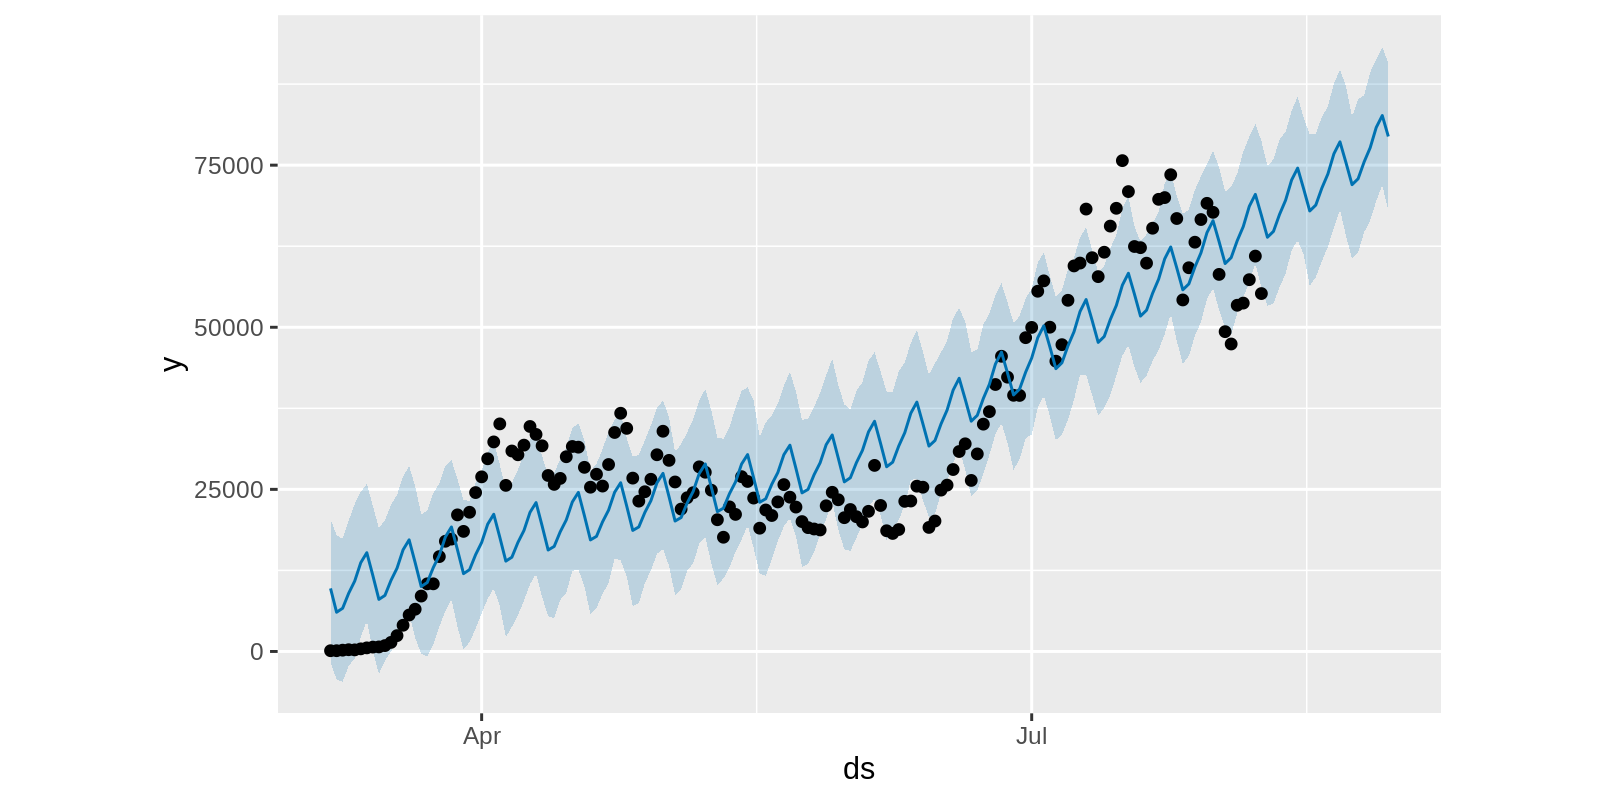

In [23]:
# Here the Prophet falls short compared to the ETS model.
# First the Prophet does not use exponential smoothing, so all past data points are weighted equally.
# In contrast, the ETS model discount the past data points. As seen in the case above, ETS detects there's no clear trend
# to predict. The number seems increasing over time, but it goes up and down, so it's hard to predict where it's headed next.
# Therefore, it chooses "N" for the trend component.
# The Prophet only sees monotonical (overall) increase, and predicts the future will follow the same direction.
plot(m, forecast)

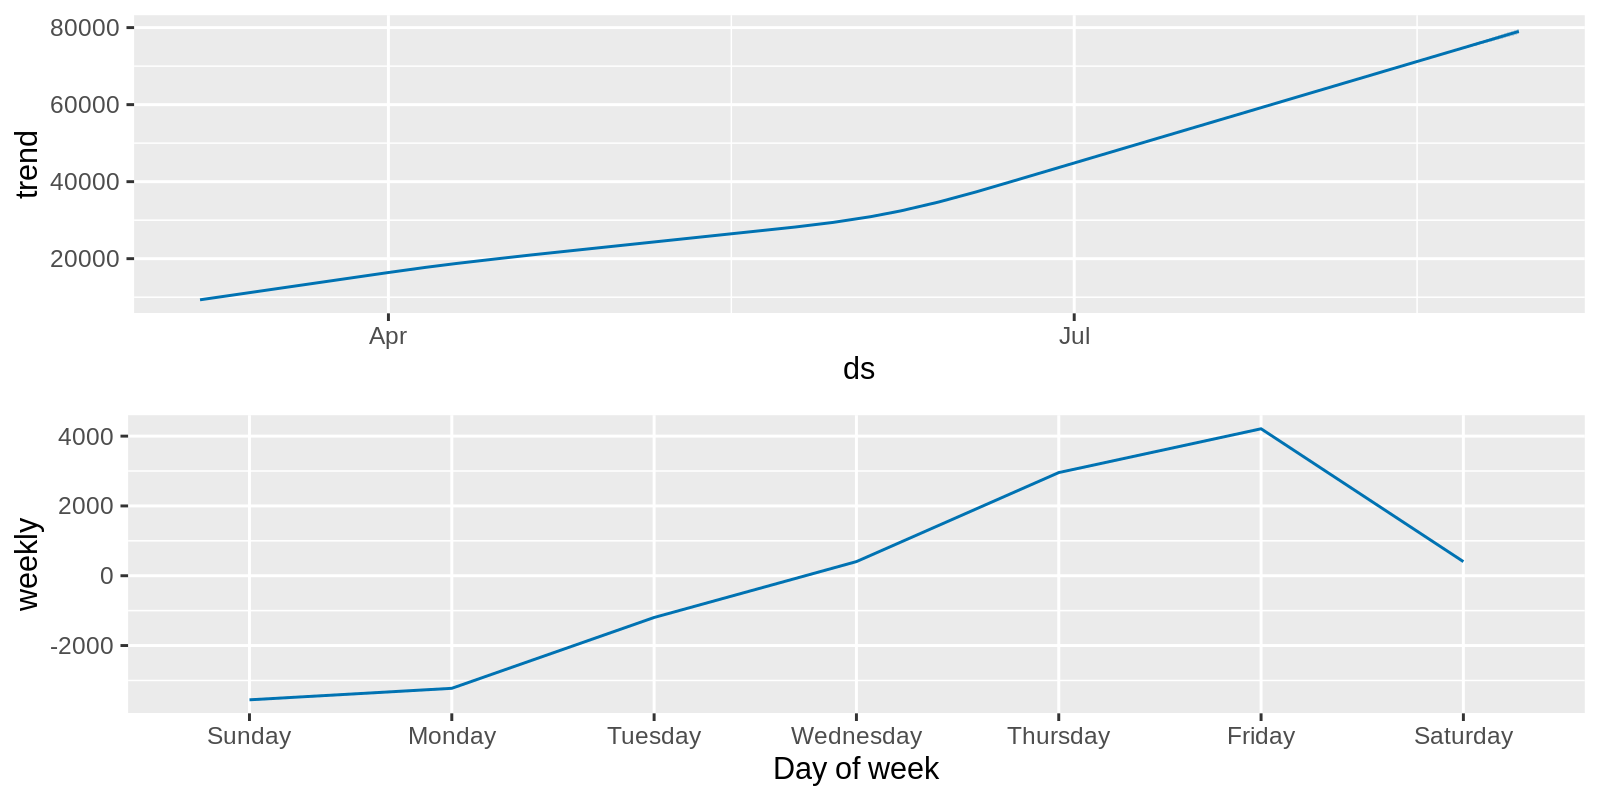

In [24]:
# You can use the prophet_plot_components function to see the forecast broken down into trend, weekly seasonality, 
# and yearlly seasonality.
prophet_plot_components(m, forecast)

In [25]:
m

$growth
[1] "linear"

$changepoints
 [1] "2020-03-12 GMT" "2020-03-17 GMT" "2020-03-22 GMT" "2020-03-27 GMT"
 [5] "2020-04-01 GMT" "2020-04-06 GMT" "2020-04-10 GMT" "2020-04-15 GMT"
 [9] "2020-04-20 GMT" "2020-04-25 GMT" "2020-04-30 GMT" "2020-05-05 GMT"
[13] "2020-05-10 GMT" "2020-05-15 GMT" "2020-05-20 GMT" "2020-05-25 GMT"
[17] "2020-05-30 GMT" "2020-06-04 GMT" "2020-06-08 GMT" "2020-06-13 GMT"
[21] "2020-06-18 GMT" "2020-06-23 GMT" "2020-06-28 GMT" "2020-07-03 GMT"
[25] "2020-07-08 GMT"

$n.changepoints
[1] 25

$changepoint.range
[1] 0.8

$yearly.seasonality
[1] "auto"

$weekly.seasonality
[1] TRUE

$daily.seasonality
[1] "auto"

$holidays
NULL

$seasonality.mode
[1] "additive"

$seasonality.prior.scale
[1] 10

$changepoint.prior.scale
[1] 0.05

$holidays.prior.scale
[1] 10

$mcmc.samples
[1] 0

$interval.width
[1] 0.8

$uncertainty.samples
[1] 1000

$specified.changepoints
[1] FALSE

$start
[1] "2020-03-07 GMT"

$y.scale
[1] 75697

$logistic.floor
[1] FALSE

$t.scale
[1] 13305600


In [26]:
# Try it with CA data
# Call the prophet function to fit th emodel.
m <- prophet(CA_p, weekly.seasonality=TRUE)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [27]:
# Prediction are made on a dataframe with a column ds containing the dates for which predictions are to be made.
# The made_future_dataframe function takes the model object and a number of periods to forecast and produces a suitable
# dataframe. By default it will also include the historical dates so we can evaluate in-sample fit.
future <- make_future_dataframe(m, periods = 21)
tail(future)

,ds
,<dttm>
162,2020-08-24
163,2020-08-25
164,2020-08-26
165,2020-08-27
166,2020-08-28
167,2020-08-29


In [28]:
# We use the generic predict function to get out forecast. The forecast object is a dataframe with a column yhat containing 
# the forecast. It has additional columns for uncertainty intervals and seasonal components.
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
162,2020-08-24,10774.82,9260.117,12300.89
163,2020-08-25,11331.09,9850.368,12795.24
164,2020-08-26,11433.53,9969.472,13072.01
165,2020-08-27,11383.44,9859.031,12898.35
166,2020-08-28,11521.76,10056.659,13001.75
167,2020-08-29,11362.95,9815.445,12924.10


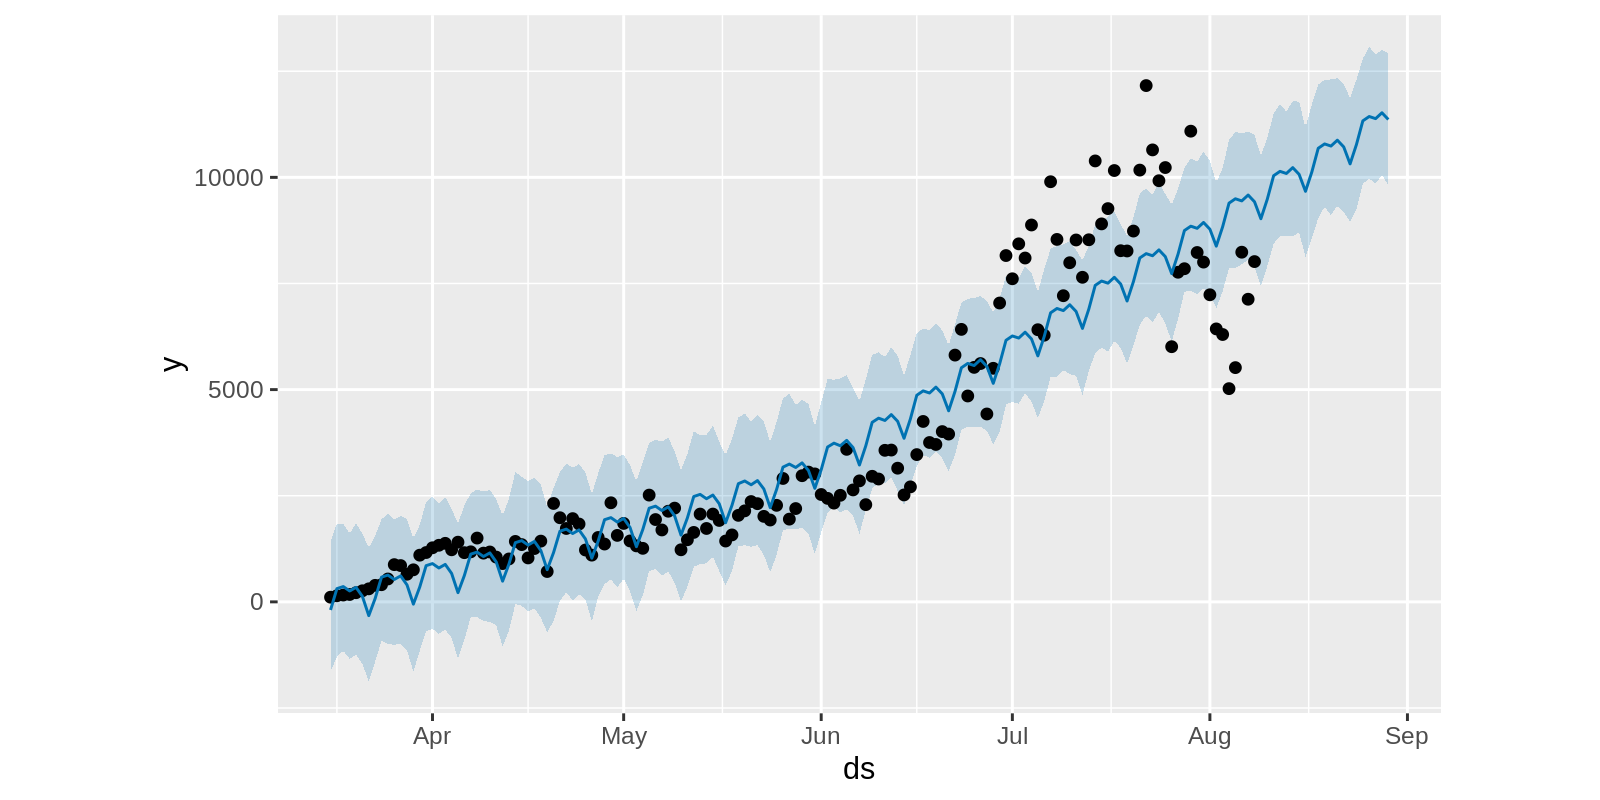

In [32]:
# Prophet's forecasting fails to capture the drop in the new cases in later days (late July - early Aug).
plot(m, forecast)

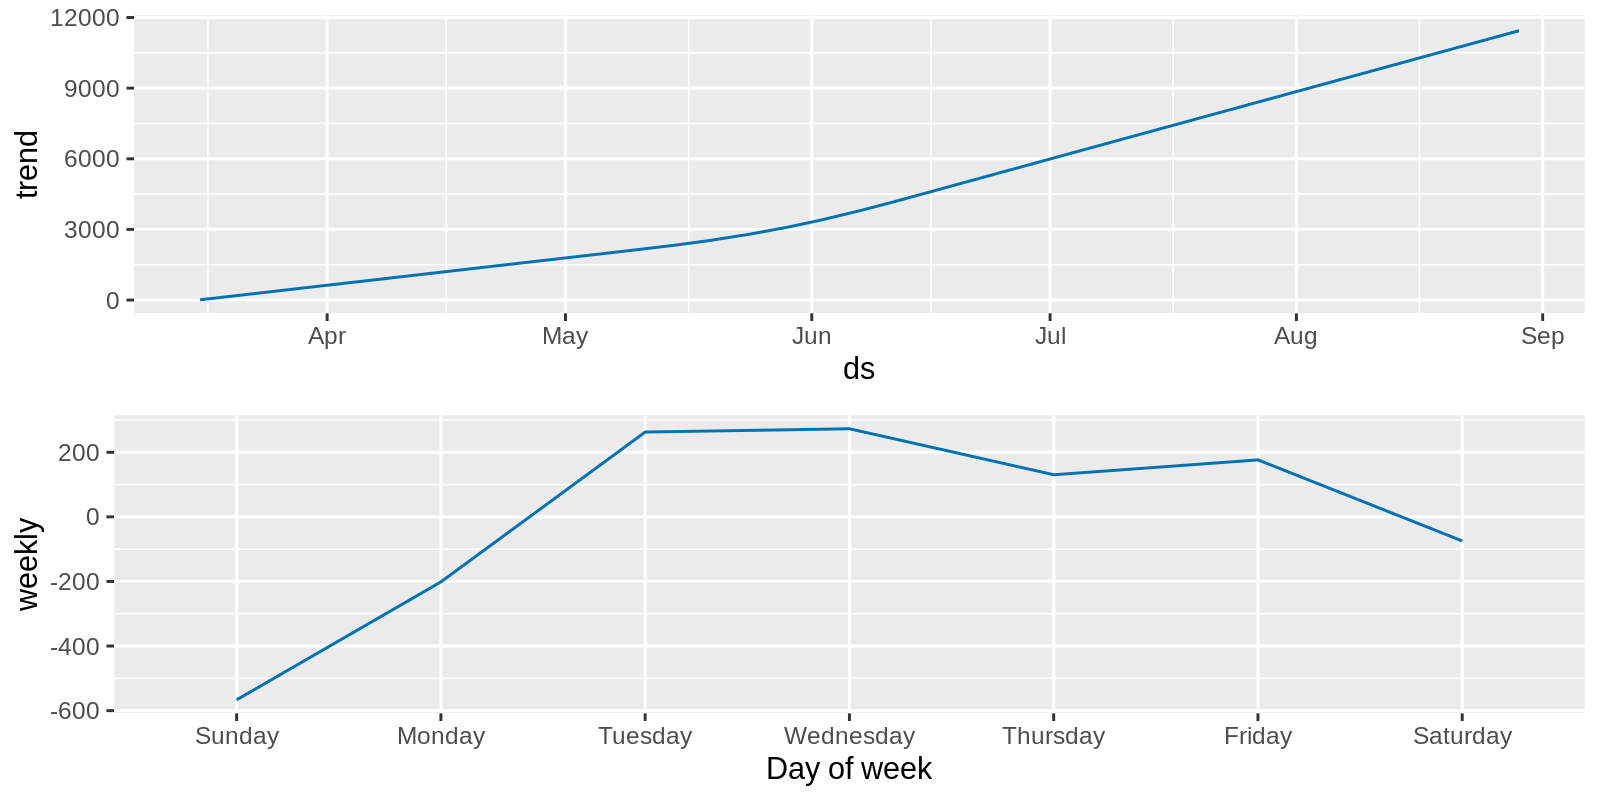

In [33]:
# You can use the prophet_plot_components function to see the forecast broken down into trend, weekly seasonality, 
# and yearlly seasonality.
prophet_plot_components(m, forecast)

In [34]:
m

$growth
[1] "linear"

$changepoints
 [1] "2020-03-21 GMT" "2020-03-25 GMT" "2020-03-30 GMT" "2020-04-03 GMT"
 [5] "2020-04-08 GMT" "2020-04-13 GMT" "2020-04-17 GMT" "2020-04-22 GMT"
 [9] "2020-04-26 GMT" "2020-05-01 GMT" "2020-05-06 GMT" "2020-05-10 GMT"
[13] "2020-05-15 GMT" "2020-05-19 GMT" "2020-05-24 GMT" "2020-05-29 GMT"
[17] "2020-06-02 GMT" "2020-06-07 GMT" "2020-06-11 GMT" "2020-06-16 GMT"
[21] "2020-06-21 GMT" "2020-06-25 GMT" "2020-06-30 GMT" "2020-07-04 GMT"
[25] "2020-07-09 GMT"

$n.changepoints
[1] 25

$changepoint.range
[1] 0.8

$yearly.seasonality
[1] "auto"

$weekly.seasonality
[1] TRUE

$daily.seasonality
[1] "auto"

$holidays
NULL

$seasonality.mode
[1] "additive"

$seasonality.prior.scale
[1] 10

$changepoint.prior.scale
[1] 0.05

$holidays.prior.scale
[1] 10

$mcmc.samples
[1] 0

$interval.width
[1] 0.8

$uncertainty.samples
[1] 1000

$specified.changepoints
[1] FALSE

$start
[1] "2020-03-16 GMT"

$y.scale
[1] 12162

$logistic.floor
[1] FALSE

$t.scale
[1] 12528000
